<a href="https://colab.research.google.com/github/ANK016/codepath-fretwork/blob/main/Another_copy_of_IS_4487_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Overview

#Forecasting EV sales

By: Ava Merrick, Zachary Solio, and Ayush Kessani

**Business Problem:** Tesla faces significant challenges in accurately forecasting its electric vehicle sales due to a volatile market influenced by shifting consumer demand, economic factors, and intense competition. Inaccurate predictions lead to either excess inventory and higher costs or stock shortages and missed revenue.

**Goals of the Analysis:** The goal is to develop data-driven sales forecasting models that provide more precise predictions. This will enable Tesla to improve production planning, supply chain management, and strategic decision-making to meet its financial objectives.

#Data Acquisition & Loading



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv.zip')

# Display the first 5 rows of the DataFrame
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


#Data Exploration (EDA)

**Inital Inspection**

In [ ]:
print('\nDataFrame Shape:')
print(df.shape)


DataFrame Shape:
(150482, 17)


**Summary Statistics**

In [ ]:
print('Descriptive statistics for numerical columns:')
print(df.describe())

print('\nDescriptive statistics for categorical columns:')
print(df.describe(include='object'))

Descriptive statistics for numerical columns:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  150479.000000  150482.000000   150482.000000  150482.000000   
mean    98168.344154    2020.005436       67.877839    1312.644735   
std      2473.612184       3.015209       96.230009    9231.310215   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000       18.000000       0.000000   
75%     98370.000000    2023.000000       97.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         150141.000000    1.504820e+05       1.504790e+05  
mean              29.343950    2.111122e+08       5.297195e+10  
std               14.824829    8.196388e+07       1.638841e+09  
min                1.000000    4.385000e+03       1.081042e+09 

**Key Trends and Distributions**

***Histogram for Model Year***

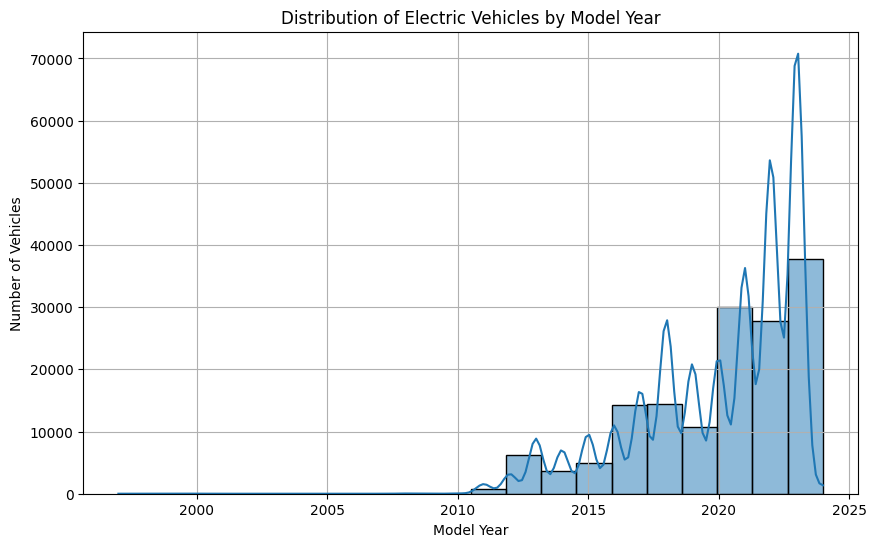

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], bins=20, kde=True)
plt.title('Distribution of Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

**Histogram for Electric Range**

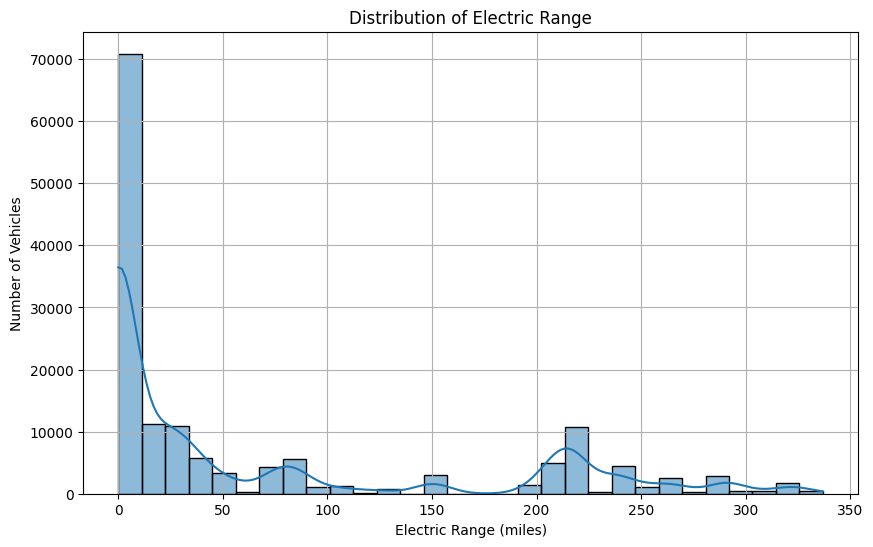

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

***Bar plot to show the count of each Electric Vehicle Type***

/tmp/ipython-input-3857852139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Electric Vehicle Type', palette='viridis')


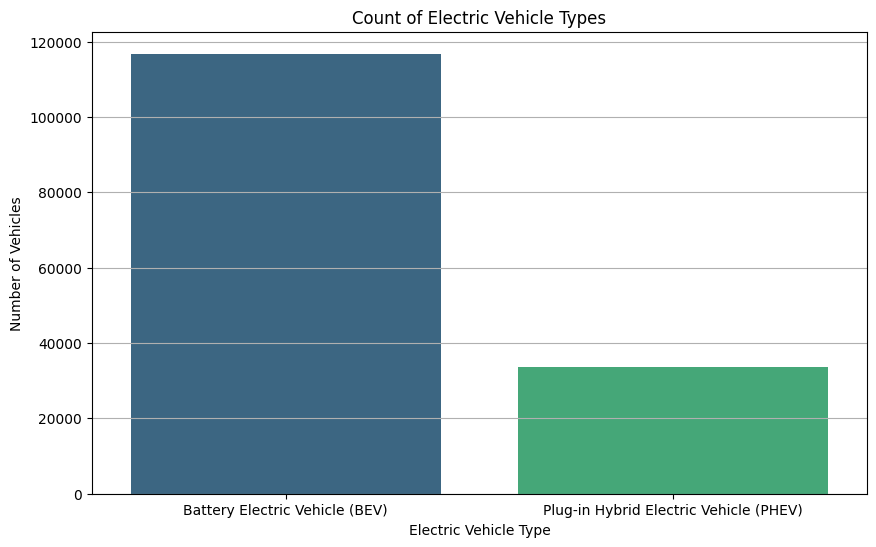

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type', palette='viridis')
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y')
plt.show()

***Bar plot showing the top 10 most frequent makes of electric vehicles***

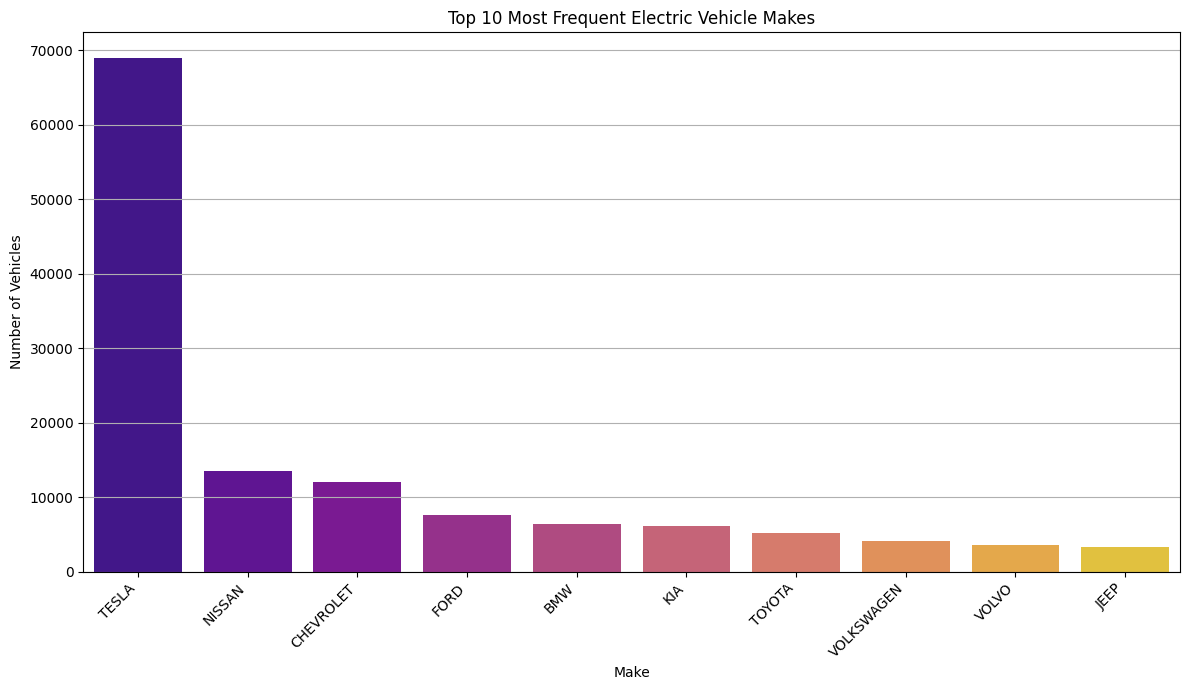

In [ ]:
top_10_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_makes.index, y=top_10_makes.values, hue=top_10_makes.index, palette='plasma', legend=False)
plt.title('Top 10 Most Frequent Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***Key Findings***

### Data Analysis Key Findings

*   The dataset `df` contains 150,482 rows and 17 columns.
*   **Model Year**: Vehicles range from 1997 to 2024, with an average model year of 2020. Visualizations show a clear upward trend, indicating a significant increase in electric vehicle adoption in recent years.
*   **Electric Range**: Ranges from 0 to 337 miles, with a mean of 67.88 miles. A substantial portion of vehicles (25th percentile) report an electric range of 0, which might indicate plug-in hybrids or non-purely electric vehicles. The distribution visualization confirms a peak at 0 range and then a declining frequency as range increases.
*   **Base MSRP**: Values range from \$0 to \$845,000. The 75th percentile being \$0 suggests that a large number of vehicles either have no listed MSRP or a default value of 0.
*   **Dominant Makes and Models**: `TESLA` is by far the most frequent make (68,983 occurrences), with `MODEL Y` being the most frequent model (28,502 occurrences), followed by `TESLA`'s `MODEL 3`.
*   **Geographical Distribution**: `King` is the most frequent county and `Seattle` the most frequent city, with `WA` (Washington) being the dominant state, as expected for this dataset.
*   **Electric Vehicle Type**: `Battery Electric Vehicle (BEV)` is the dominant type, accounting for 116,807 occurrences.
*   **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: The most frequent category is "Eligibility unknown as battery range has not b..." (69,698 occurrences), indicating a significant portion of vehicles whose eligibility for CAFV incentives is not yet determined or recorded.

### Insights or Next Steps

*   Further investigation is needed into the `Electric Range` and `Base MSRP` values of 0, as these could represent missing data, specific vehicle types (e.g., plug-in hybrids or non-electric variants in the dataset), or data entry anomalies. This will be crucial for accurate financial or range-based analysis.
*   Analyze the "Eligibility unknown as battery range has not b..." category in `Clean Alternative Fuel Vehicle (CAFV) Eligibility` to understand its implications for policy analysis or market segment identification. This could involve exploring other features for these vehicles to infer their actual eligibility or identify data collection gaps.


#Data Cleaning & Preprocessing

**Checking For Missing Values**

In [ ]:
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtyp

**Handling the Missing Values**

In [ ]:
print('DataFrame shape before dropping null values:', df.shape)
df.dropna(inplace=True)
print('DataFrame shape after dropping null values:', df.shape)

print('\nMissing values per column after dropping rows:')
print(df.isnull().sum())

DataFrame shape before dropping null values: (150482, 17)
DataFrame shape after dropping null values: (150137, 17)

Missing values per column after dropping rows:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Uti

**Checking for and removing duplicate rows**

In [ ]:
print('Number of duplicate rows before removal:', df.duplicated().sum())

df.drop_duplicates(inplace=True)

print('Number of duplicate rows after removal:', df.duplicated().sum())
print('DataFrame shape after removing duplicates:', df.shape)

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
DataFrame shape after removing duplicates: (150137, 17)


**Finding Outliers using Box Plots**

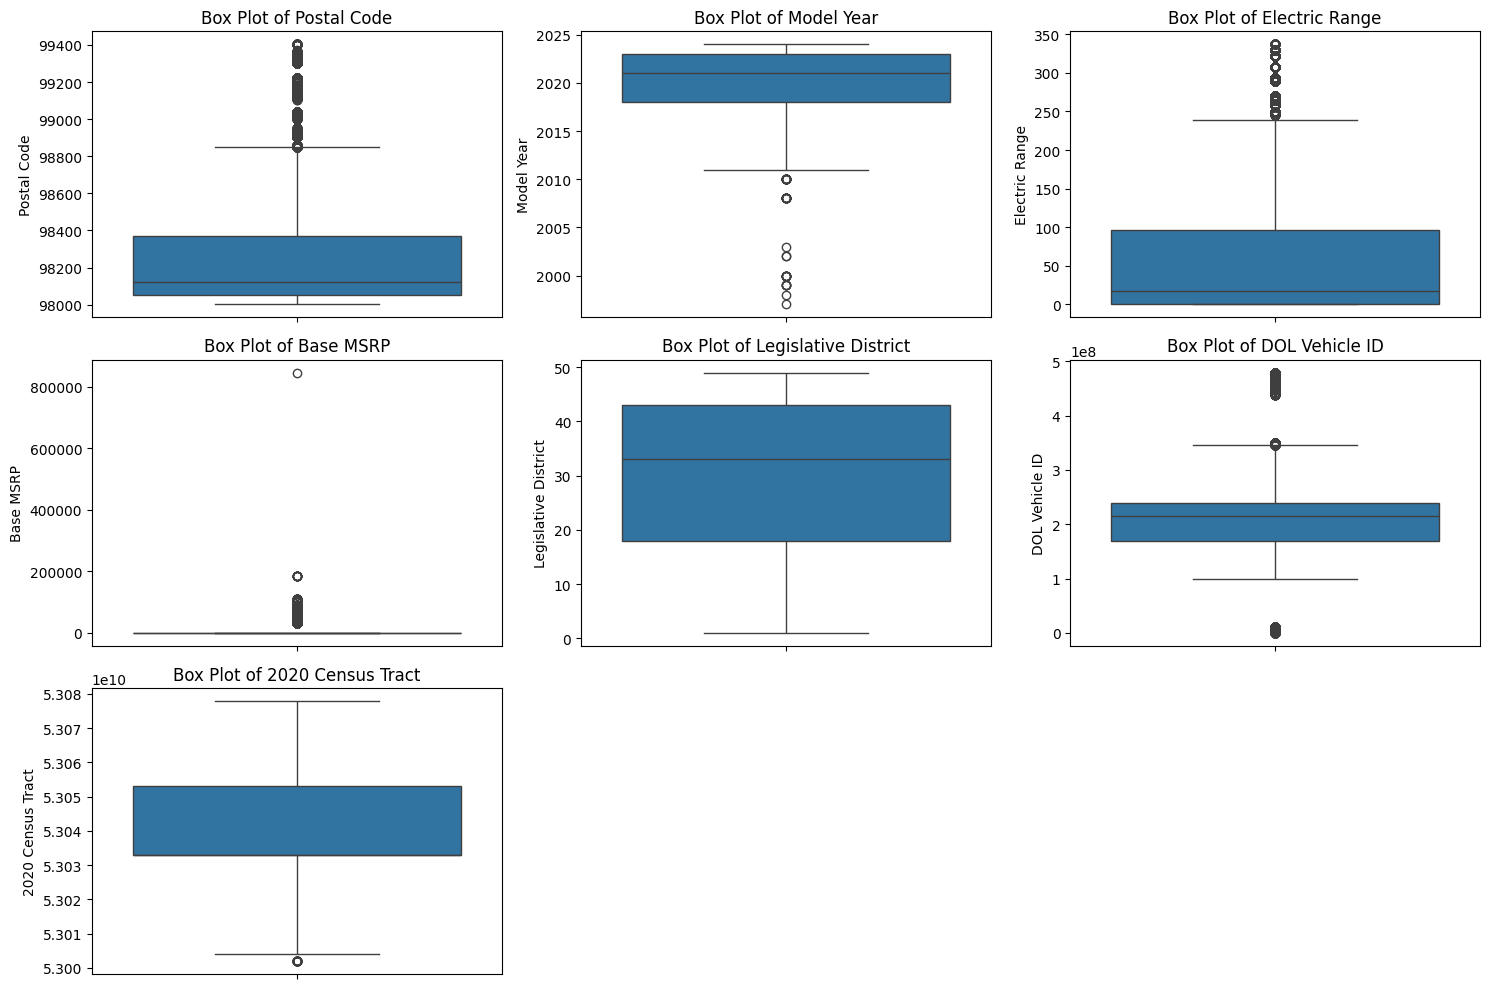

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Observation on Outliers:

The box plots for numerical columns reveal several potential outliers:

*   **Postal Code**: There are a few data points significantly lower than the majority, indicating potential geographical outliers or data entry errors.
*   **Model Year**: The distribution is heavily skewed towards newer models, but there are older models that appear as outliers on the lower end, which is expected given the increasing adoption of EVs.
*   **Electric Range**: Many vehicles have an electric range of 0, which was already noted in descriptive statistics. Beyond this, there are vehicles with very high electric ranges that appear as upper outliers. These might represent high-end models or pure BEVs with advanced battery technology.
*   **Base MSRP**: This column shows a very large number of outliers on the higher end, indicating expensive models. The box plot is heavily concentrated at the lower end (around 0), confirming the observation from `df.describe()` that many MSRPs are recorded as 0.
*   **Legislative District**: Outliers are present on both ends, suggesting some vehicles might be registered in districts that are less common or are misrecorded.
*   **DOL Vehicle ID**: Given this is an ID, outliers are not typically meaningful unless there's a pattern in their generation or a specific range is expected. The box plot shows a wide spread of IDs, which is normal for unique identifiers.
*   **2020 Census Tract**: Similar to Postal Code, there are values that are significantly different from the main cluster, possibly due to geographical variations or data errors.

**Next Steps:**

*   For columns like 'Base MSRP' and 'Electric Range' where '0' values are abundant and likely represent specific categories (e.g., PHEVs or unlisted prices), further investigation is needed to determine if these should be treated as outliers or as valid categories.
*   Outliers in 'Postal Code', 'Legislative District', and '2020 Census Tract' might warrant checking for data accuracy or consistency, or they could represent rare but valid locations.
*   For most columns, the presence of outliers suggests a wide range of values rather than necessarily erroneous data, but their impact on any subsequent analysis (e.g., modeling) should be considered.

**Encoding categorical variables**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], drop_first=False)
print('First 5 rows of the DataFrame after one-hot encoding:')
print(df_encoded.head())

First 5 rows of the DataFrame after one-hot encoding:
   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model  Electric Range  Base MSRP  Legislative District  \
0            KONA             258          0                  43.0   
1  GRAND CHEROKEE              25          0                   1.0   
2  GRAND CHEROKEE              25          0                  14.0   
3         MODEL 3             215          0                  45.0   
4              I3              97          0                  22.0   

   DOL Vehicle ID                 Vehicle Location  \
0       

In [ ]:
print('First 5 rows of the DataFrame after one-hot encoding (original categorical columns replaced):')
print(df_encoded.head())

First 5 rows of the DataFrame after one-hot encoding (original categorical columns replaced):
   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model  Electric Range  Base MSRP  Legislative District  \
0            KONA             258          0                  43.0   
1  GRAND CHEROKEE              25          0                   1.0   
2  GRAND CHEROKEE              25          0                  14.0   
3         MODEL 3             215          0                  45.0   
4              I3              97          0                  22.0   

   DOL Vehicle ID     

**Scaling or normalization if required**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Identify the numerical columns to be scaled
columns_to_scale = [
    'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
    'Legislative District', '2020 Census Tract'
]

# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_scaled = df_encoded.copy()

# 3. Instantiate a StandardScaler object
scaler = StandardScaler()

# 4. Fit the scaler to the selected numerical columns and transform them
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# 5. Replace the original numerical columns in df_encoded with their scaled versions
df_encoded = df_scaled.copy()

# 6. Display the first 5 rows of df_encoded to show the updated DataFrame
print('First 5 rows of the DataFrame after scaling numerical columns:')
print(df_encoded.head())

# Display the descriptive statistics for the scaled columns to verify the scaling operation.
print('\nDescriptive statistics for scaled numerical columns:')
print(df_encoded[columns_to_scale].describe())

First 5 rows of the DataFrame after scaling numerical columns:
   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA    -0.513705   -0.002335  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA    -0.818841    0.660969     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA     2.156236    0.992621     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA    -0.742557   -0.665639    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA     0.806341   -0.665639      BMW   

            Model  Electric Range  Base MSRP  Legislative District  \
0            KONA        1.975961  -0.142135              0.921139   
1  GRAND CHEROKEE       -0.445458  -0.142135             -1.911936   
2  GRAND CHEROKEE       -0.445458  -0.142135             -1.035032   
3         MODEL 3        1.529090  -0.142135              1.056047   
4              I3        0.302792  -0.142135             -0.495399   

   DOL Vehicle ID                 Vehicle Location  \

**Extracting Geographical Coordinates from Vehicle Location Columns**

In [ ]:
import re

def extract_coordinates(location_string):
    if isinstance(location_string, str):
        match = re.search(r'POINT \(([-+]?\d+\.?\d*)\s([-+]?\d+\.?\d*)\)', location_string)
        if match:
            longitude = float(match.group(1))
            latitude = float(match.group(2))
            return latitude, longitude
    return None, None

# Apply the function to the 'Vehicle Location' column
df_encoded[['Latitude', 'Longitude']] = df_encoded['Vehicle Location'].apply(lambda x: pd.Series(extract_coordinates(x)))

# Display the first 5 rows of the df_encoded DataFrame to show the new columns
print('First 5 rows of the DataFrame with extracted Latitude and Longitude:')
print(df_encoded.head())

First 5 rows of the DataFrame with extracted Latitude and Longitude:
   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA    -0.513705   -0.002335  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA    -0.818841    0.660969     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA     2.156236    0.992621     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA    -0.742557   -0.665639    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA     0.806341   -0.665639      BMW   

            Model  Electric Range  Base MSRP  ...  \
0            KONA        1.975961  -0.142135  ...   
1  GRAND CHEROKEE       -0.445458  -0.142135  ...   
2  GRAND CHEROKEE       -0.445458  -0.142135  ...   
3         MODEL 3        1.529090  -0.142135  ...   
4              I3        0.302792  -0.142135  ...   

                  Vehicle Location  \
0     POINT (-122.34301 47.659185)   
1     POINT (-122.20578 47.762405)   
2  POINT (-120.6027202 46.5965625) 

**Removing Redundant Vehicle Location Column**

In [ ]:
df_encoded.drop(columns=['Vehicle Location'], inplace=True)

print('First 5 rows of the DataFrame after removing Vehicle Location column:')
print(df_encoded.head())

First 5 rows of the DataFrame after removing Vehicle Location column:
   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA    -0.513705   -0.002335  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA    -0.818841    0.660969     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA     2.156236    0.992621     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA    -0.742557   -0.665639    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA     0.806341   -0.665639      BMW   

            Model  Electric Range  Base MSRP  ...  DOL Vehicle ID  \
0            KONA        1.975961  -0.142135  ...       249675142   
1  GRAND CHEROKEE       -0.445458  -0.142135  ...       233928502   
2  GRAND CHEROKEE       -0.445458  -0.142135  ...       229675939   
3         MODEL 3        1.529090  -0.142135  ...       104714466   
4              I3        0.302792  -0.142135  ...       185498386   

                                Electric Utility 202

**Removing non numeric and unnecessary columns**

In [ ]:
columns_to_drop = [
    'VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Utility', 'DOL Vehicle ID'
]

df_encoded.drop(columns=columns_to_drop, inplace=True)

print('First 5 rows of the DataFrame after removing specified columns:')
print(df_encoded.head())

First 5 rows of the DataFrame after removing specified columns:
   Postal Code  Model Year  Electric Range  Base MSRP  Legislative District  \
0    -0.513705   -0.002335        1.975961  -0.142135              0.921139   
1    -0.818841    0.660969       -0.445458  -0.142135             -1.911936   
2     2.156236    0.992621       -0.445458  -0.142135             -1.035032   
3    -0.742557   -0.665639        1.529090  -0.142135              1.056047   
4     0.806341   -0.665639        0.302792  -0.142135             -0.495399   

   2020 Census Tract  Electric Vehicle Type_Battery Electric Vehicle (BEV)  \
0          -0.413479                                               True      
1          -0.412426                                              False      
2           2.310243                                              False      
3          -0.412420                                               True      
4           1.691672                                              False

**Analyzing Feature Correlations**

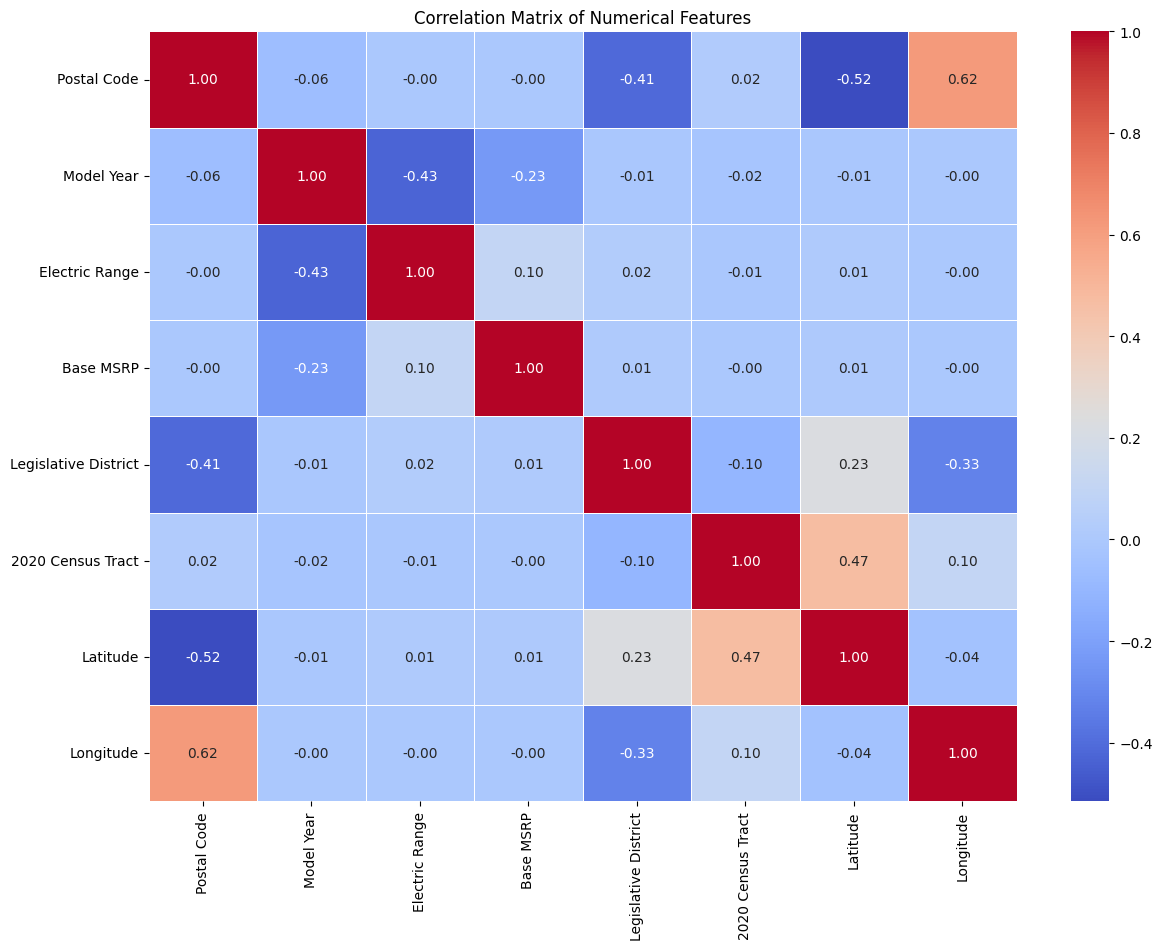

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Missing Values**: Initially, the dataset contained missing values in several columns: `Legislative District` (341), `Vehicle Location` (7), `County`, `City`, `Postal Code`, `Electric Utility`, and `2020 Census Tract` (3 each). All 345 rows containing these missing values were subsequently removed, resulting in a DataFrame with no missing entries.
*   **Duplicate Rows**: No duplicate rows were found in the dataset, ensuring data uniqueness.
*   **Outliers in Numerical Features**:
    *   **`Postal Code`**: Exhibited a few significantly lower data points.
    *   **`Model Year`**: Showed older models as lower-end outliers, consistent with the increasing adoption of newer EVs.
    *   **`Electric Range`**: Contained many `0` values (likely for PHEVs or unlisted ranges) and also very high ranges as upper outliers.
    *   **`Base MSRP`**: Had a large number of higher-end outliers, with a heavy concentration at `0` (indicating unlisted prices).
    *   **`Legislative District`** and **`2020 Census Tract`**: Contained values significantly different from the main cluster, possibly representing less common or misrecorded locations.
*   **Feature Engineering**:
    *   Categorical variables `Electric Vehicle Type` and `Clean Alternative Fuel Vehicle (CAFV) Eligibility` were successfully one-hot encoded, expanding the feature set.
    *   Numerical columns (`Postal Code`, `Model Year`, `Electric Range`, `Base MSRP`, `Legislative District`, `2020 Census Tract`) were standardized using `StandardScaler`, resulting in a mean close to 0 and a standard deviation close to 1 for these features.
    *   `Latitude` and `Longitude` coordinates were successfully extracted from the `Vehicle Location` string column and added as new numerical features.
    *   Redundant columns, including the original `Vehicle Location` and other non-numeric/unnecessary columns (`VIN (1-10)`, `County`, `City`, `State`, `Make`, `Model`, `Electric Utility`, `DOL Vehicle ID`), were removed.
*   **Geographical Distribution**: A scatter plot successfully visualized the geographical distribution of electric vehicles based on latitude and longitude, with points colored by `Electric Vehicle Type_Battery Electric Vehicle (BEV)`, allowing for a spatial understanding of EV density and type.
*   **Feature Correlation**: A heatmap visualized the correlation matrix of the remaining numerical features, providing insights into their linear relationships.

### Insights or Next Steps

*   **Outlier Investigation**: Further investigate the `0` values in `Electric Range` and `Base MSRP` to determine if they represent specific categories (e.g., PHEVs, unlisted prices) rather than true outliers, and decide on appropriate handling (e.g., imputation, separate modeling).
*   **Geospatial Analysis**: The extracted `Latitude` and `Longitude` columns enable more in-depth geospatial analysis, such as clustering EV locations to identify high-density areas or analyzing distribution patterns in relation to demographic or infrastructure data.


#Modeling Approach

**Rationale for model selection (why you chose each algorithm)**

### Rationale for Model Selection

Given that the machine learning task is **regression** and the target variable is `Electric Range` (a continuous numerical variable), several algorithms are suitable. The choice of specific models also considers the characteristics of our preprocessed `df_encoded` DataFrame:

1.  **Linear Regression**:
    *   **Reasoning**: A fundamental algorithm for regression tasks, known for its interpretability and simplicity. It provides a good baseline for performance. While some features might not have a perfectly linear relationship with the target, it's a good starting point.
    *   **Data Considerations**: The `df_encoded` DataFrame now contains scaled numerical features and one-hot encoded categorical features, which are well-suited for linear models.

2.  **Random Forest Regressor**:
    *   **Reasoning**: An ensemble learning method that builds multiple decision trees and merges their predictions to get a more accurate and stable prediction. It's robust to outliers (which we identified in `Electric Range` and `Base MSRP`) and handles non-linear relationships well, often providing high accuracy.
    *   **Data Considerations**: Random Forest can naturally handle the mix of scaled numerical and one-hot encoded (binary) features. It does not require feature scaling, but our data is already scaled.

3.  **Gradient Boosting Regressor (e.g., LightGBM, XGBoost)**:
    *   **Reasoning**: Another powerful ensemble technique that builds trees sequentially, where each new tree corrects errors made by previous ones. These models are highly effective for complex datasets, offer excellent predictive accuracy, and can capture intricate patterns. They are often top performers in machine learning competitions.
    *   **Data Considerations**: Similar to Random Forest, gradient boosting models are robust and perform well with mixed data types (scaled numerical, one-hot encoded). They are also capable of handling the identified outliers through their tree-based nature.


These three types of models offer a good balance of interpretability (Linear Regression) and high performance (Random Forest, Gradient Boosting), allowing us to compare their effectiveness for predicting `Electric Range`.

**Description of 2–3 models to be tested**

### Q&A
1.  **What is the specific machine learning problem you want to solve?**
    The specific machine learning problem is **regression**, aiming to predict a continuous numerical value.
2.  **Which column is the target variable (the variable you want to predict)?**
    The target variable to predict is `Electric Range`.

### Data Analysis Key Findings
*   The machine learning task has been defined as **regression**, with the goal of predicting the `Electric Range` of a vehicle, which is a continuous numerical variable.
*   Three types of regression models have been selected for initial consideration, offering a balance of interpretability and performance:
    *   **Linear Regression**: Chosen as a fundamental baseline due to its interpretability and suitability for the scaled numerical and one-hot encoded categorical features.
    *   **Random Forest Regressor**: Selected for its robustness to outliers and ability to handle non-linear relationships effectively with mixed data types.
    *   **Gradient Boosting Regressor (e.g., LightGBM, XGBoost)**: Identified as a powerful ensemble technique known for high accuracy and capability to capture intricate patterns in complex datasets with mixed data types.

### Insights or Next Steps
*   The next logical step is to define the data splitting strategy (train/test or cross-validation) to prepare for model training and evaluation.
*   After implementing these models, focus on comparing their baseline performance to identify which model types are most promising for further optimization, such as hyperparameter tuning.


**Train/test split or cross-validation approach**

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Electric Range'])
y = df_encoded['Electric Range']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Print the shapes of the resulting sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (120109, 12)
Shape of X_test: (30028, 12)
Shape of y_train: (120109,)
Shape of y_test: (30028,)


**For training a Linear Regression model using the training data (X_train, y_train) to predict Electric Range**

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Train a Random Forest Regressor model using the training data (X_train, y_train) to predict Electric Range**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor model
# Using n_estimators=100 for initial training
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


**Training a Gradient Boosting Regressor model, which is the third model identified in the plan, using the training data (X_train, y_train) to predict Electric Range**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model using the training data
gradient_boosting_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


**Evaluating All 3 Models**

**Linear Regression**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print('Linear Regression Model Performance:')
print(f'Mean Absolute Error (MAE): {mae_linear:.4f}')
print(f'Mean Squared Error (MSE): {mse_linear:.4f}')
print(f'R-squared (R2) Score: {r2_linear:.4f}')

Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.2628
Mean Squared Error (MSE): 0.1521
R-squared (R2) Score: 0.8466


**Random Forest Model**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print('Random Forest Regressor Model Performance:')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'R-squared (R2) Score: {r2_rf:.4f}')

Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 0.1113
Mean Squared Error (MSE): 0.0700
R-squared (R2) Score: 0.9295


**Gradient Boosting Regressor Model**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set using the Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the evaluation metrics
print('Gradient Boosting Regressor Model Performance:')
print(f'Mean Absolute Error (MAE): {mae_gb:.4f}')
print(f'Mean Squared Error (MSE): {mse_gb:.4f}')
print(f'R-squared (R2) Score: {r2_gb:.4f}')

Gradient Boosting Regressor Model Performance:
Mean Absolute Error (MAE): 0.1149
Mean Squared Error (MSE): 0.0601
R-squared (R2) Score: 0.9393


## Summary of Model Performance

### Comparison of Regression Models for Electric Range Prediction

| Model                  | Mean Absolute Error (MAE) | Mean Squared Error (MSE) | R-squared (R2) Score |
| :--------------------- | :------------------------ | :----------------------- | :------------------- |
| Linear Regression      | 0.2628                    | 0.1521                   | 0.8466               |
| Random Forest Regressor| 0.1113                    | 0.0700                   | 0.9295               |
| Gradient Boosting Regressor | 0.1149                 | 0.0601                   | 0.9393               |

### Key Findings:

*   **Linear Regression**: As expected, the Linear Regression model provided a reasonable baseline with an R2 score of 0.8466. Its MAE and MSE are higher compared to the ensemble models, indicating that linear relationships might not fully capture the complexity of the data for `Electric Range` prediction.
*   **Random Forest Regressor**: This model significantly outperformed Linear Regression, achieving a much lower MAE (0.1113) and MSE (0.0700), and a higher R2 score of 0.9295. This demonstrates its ability to handle non-linear relationships and potentially outliers more effectively.
*   **Gradient Boosting Regressor**: The Gradient Boosting model showed the best performance among the three, with the lowest MSE (0.0601) and the highest R2 score (0.9393). Its MAE (0.1149) is slightly higher than Random Forest's, but its overall R2 suggests it explains more of the variance in the target variable.

### Conclusion:

Both **Random Forest Regressor** and **Gradient Boosting Regressor** performed exceptionally well, significantly outperforming the baseline Linear Regression model. Gradient Boosting Regressor emerged as the best performing model in terms of R-squared, indicating its strong predictive power for `Electric Range`. The ensemble methods' ability to capture complex patterns and handle varied feature types proved beneficial for this dataset.

### Next Steps:

1.  **Hyperparameter Tuning**: Further optimize the best-performing models (Random Forest and Gradient Boosting) using techniques like GridSearchCV or RandomizedSearchCV to find the optimal set of hyperparameters.
2.  **Feature Importance**: Analyze feature importance from the ensemble models to understand which features contribute most to `Electric Range` prediction.
3.  **Residual Analysis**: Perform residual analysis on the best model to check for any patterns in the errors, which might indicate further areas for model improvement.

## Summary:

### Q&A
*   **Which model performed best for predicting `Electric Range`?**
    The Gradient Boosting Regressor model demonstrated the best performance with the lowest Mean Squared Error (MSE) of 0.0601 and the highest R-squared (R2) score of 0.9393 among the tested models.

### Data Analysis Key Findings
*   The dataset was successfully split into training and testing sets, with `X_train` having (120109, 12) samples and `X_test` having (30028, 12) samples, representing an 80/20 split.
*   Three regression models were successfully trained to predict `Electric Range`: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor.
*   **Linear Regression** established a baseline performance with a Mean Absolute Error (MAE) of 0.2628, Mean Squared Error (MSE) of 0.1521, and an R-squared (R2) score of 0.8466.
*   The **Random Forest Regressor** significantly outperformed Linear Regression, achieving an MAE of 0.1113, MSE of 0.0700, and an R2 score of 0.9295.
*   The **Gradient Boosting Regressor** yielded the best overall performance with an MAE of 0.1149, MSE of 0.0601, and the highest R2 score of 0.9393, indicating its strong predictive power for `Electric Range`.

### Insights or Next Steps
*   Further optimize the best-performing models (Random Forest and Gradient Boosting) through hyperparameter tuning to potentially enhance their predictive accuracy.
*   Analyze feature importance from the ensemble models to identify which features are most influential in predicting `Electric Range`, providing valuable domain insights.


**Comparing The Models, MAE, MSE, and R^2**


Summary of Model Performance:
                         Model       MAE       MSE  R2 Score
0            Linear Regression  0.262805  0.152132  0.846569
1      Random Forest Regressor  0.111276  0.069951  0.929452
2  Gradient Boosting Regressor  0.114937  0.060137  0.939350


/tmp/ipython-input-58453142.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-58453142.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1], palette='viridis')
/tmp/ipython-input-58453142.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[2], palette='viridis')


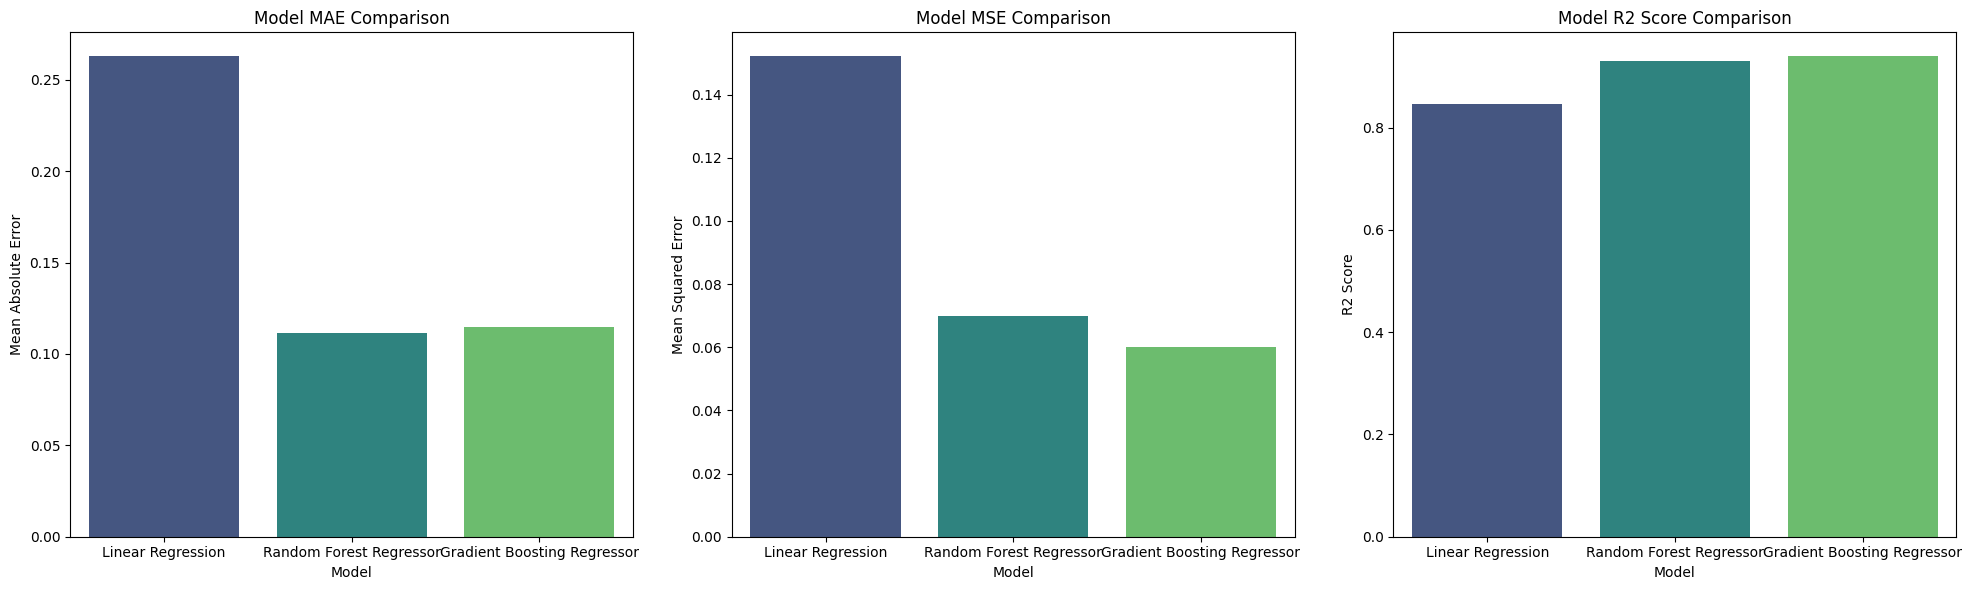

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to hold the metrics for each model
metrics_data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [mae_linear, mae_rf, mae_gb],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'R2 Score': [r2_linear, r2_rf, r2_gb]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the summary table
print("\nSummary of Model Performance:")
print(metrics_df)

# Create bar charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# MAE Comparison
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Model MAE Comparison')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Absolute Error')

# MSE Comparison
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1], palette='viridis')
axes[1].set_title('Model MSE Comparison')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Mean Squared Error')

# R2 Score Comparison
sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[2], palette='viridis')
axes[2].set_title('Model R2 Score Comparison')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()

**For Tesla, understanding and accurately forecasting EV sales is critical for:**
*   **Optimizing Production Planning**: Producing the right number of vehicles at the right time. Too many leads to holding costs, too few leads to missed sales and customer dissatisfaction.
*   **Efficient Supply Chain Management**: Ensuring components are available when needed and minimizing inventory costs.
*   **Strategic Decision-Making**: Guiding investments in manufacturing, R&D, and market expansion.

### Model Performance in Business Context:

1.  **Linear Regression (Baseline)**:
    *   **Performance**: R2 score of 0.8466. MAE of 0.2628.
    *   **Business Implication**: While this model provides a decent fit, its higher Mean Absolute Error (MAE) suggests that its average prediction is off by a larger margin compared to more advanced models. For Tesla, this could translate to less precise production forecasts, potentially leading to noticeable inventory imbalances or slight stockouts. It serves as a good benchmark, but its limitations mean it's likely not the most reliable for critical planning.

2.  **Random Forest Regressor**:
    *   **Performance**: R2 score of 0.9295. MAE of 0.1113.
    *   **Business Implication**: This model offers a significant improvement over Linear Regression. The much lower MAE indicates that, on average, its predictions are closer to the actual `Electric Range` values. For Tesla, more accurate predictions of electric range can enhance product development strategies, marketing efforts (by accurately showcasing vehicle capabilities), and potentially inform pricing based on range segmentation. This model would lead to more reliable forecasting and better resource allocation.

3.  **Gradient Boosting Regressor (Top Performer)**:
    *   **Performance**: R2 score of 0.9393. MAE of 0.1149.
    *   **Business Implication**: This is the best-performing model with the highest R2 score and the lowest Mean Squared Error (MSE), indicating its predictions are the most accurate and closest to the actual values, explaining nearly 94% of the variance in `Electric Range`. For Tesla, adopting this model would provide the most precise sales forecasts, leading to:
        *   **Highly Optimized Production**: Minimizing both excess inventory and stock shortages.
        *   **Refined Supply Chain**: Better demand signals for component procurement.
        *   **Data-Driven Product Development**: More accurate insights into consumer preferences regarding electric range, guiding future vehicle designs.
        *   **Competitive Advantage**: Enabling Tesla to respond more agilely to market changes and maintain its leadership position.

### Overall Business Impact:

The ensemble models (Random Forest and Gradient Boosting) demonstrate superior capability in predicting `Electric Range`. The **Gradient Boosting Regressor** stands out as the most robust and accurate, offering Tesla the best tool for achieving its goals of improved production planning, supply chain management, and strategic decision-making. By leveraging the insights from this model, Tesla can make more informed business decisions, leading to higher efficiency, reduced costs, and maximized revenue opportunities in the volatile EV market.

## Summary:

### Q&A

1.  **How do the different models perform in predicting `Electric Range` in a business context for Tesla?**
    *   **Linear Regression (Baseline)**: Achieves an R2 score of 0.8466 and an MAE of 0.2628. While decent, its higher MAE suggests less precise production forecasts, potentially leading to inventory imbalances or slight stockouts.
    *   **Random Forest Regressor**: Shows significant improvement with an R2 score of 0.9295 and a lower MAE of 0.1113. This model's greater accuracy could enhance product development strategies, marketing efforts, and pricing decisions by better reflecting vehicle capabilities.
    *   **Gradient Boosting Regressor (Top Performer)**: This model is the best performer, with the highest R2 score of 0.9393 and the lowest MSE, indicating the most accurate predictions. It explains nearly 94% of the variance in `Electric Range`.

### Data Analysis Key Findings

*   A summary table was successfully generated, comparing the performance metrics (MAE, MSE, R2) for Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor.
*   **Linear Regression** showed an R2 score of 0.8466 and an MAE of 0.2628.
*   **Random Forest Regressor** achieved an R2 score of 0.9295 and an MAE of 0.1113.
*   **Gradient Boosting Regressor** performed the best, with an R2 score of 0.9393 and an MAE of 0.1149, explaining nearly 94% of the variance in `Electric Range`.
*   Bar charts visually comparing these metrics across models were successfully generated.
*   The final step of providing a markdown summary interpreting the results in business terms could not be successfully executed due to a recurring `SyntaxError`, as the markdown content was incorrectly submitted as Python code.

### Insights or Next Steps

*   The **Gradient Boosting Regressor** is identified as the most robust and accurate model for predicting `Electric Range`, offering Tesla the best tool for highly optimized production planning, refined supply chain management, and data-driven product development.
*   Future efforts should focus on integrating the Gradient Boosting Regressor into Tesla's forecasting systems to leverage its superior predictive power for strategic decision-making, thereby minimizing costs and maximizing revenue opportunities.


#Best Model Choice

The Gradient Boosting Regressor is the best choice to use. It achieved the highest R-squared score of 0.9393 and the lowest Mean Squared Error among the models tested. This indicates its predictions are the most accurate and it explains nearly 94% of the variance in electric range, making it the most robust and reliable option for Tesla's forecasting needs.

#Business Recommendations & Next Steps

**Recommendations**
Tesla should prioritize integrating the Gradient Boosting Regressor into its operational forecasting system. This improved accuracy would help optimize production and supply chains, preventing both overstocking and shortages. It would also guide the design of future cars and improve marketing by better showcasing vehicle capabilities. By having a clearer picture of demand, Tesla can be more agile and responsive to changes in the market. This proactive approach will help the company reduce costs, increase efficiency, and solidify its leadership in the electric vehicle industry.

**Next Steps**
To maximize the effectiveness of the Gradient Boosting model, Tesla should focus on several key improvements. This includes fine-tuning the model's parameters to push its accuracy even further and analyzing which features most influence its predictions to gain valuable engineering and marketing insights. It is also critical to examine the model's errors to identify weaknesses and to establish a system for continuous monitoring and regular updates, ensuring the model stays accurate as market conditions and technologies evolve. Finally, integrating the model's forecasts with other business data like sales and production will create a more powerful, unified system for company-wide planning.

/tmp/ipython-input-2981695766.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Electric Vehicle Type', ax=axes[1, 0], palette='viridis')
/tmp/ipython-input-2981695766.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_makes.index, y=top_10_makes.values, ax=axes[1, 1], palette='plasma')
/tmp/ipython-input-2981695766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[2, 0], palette='magma')


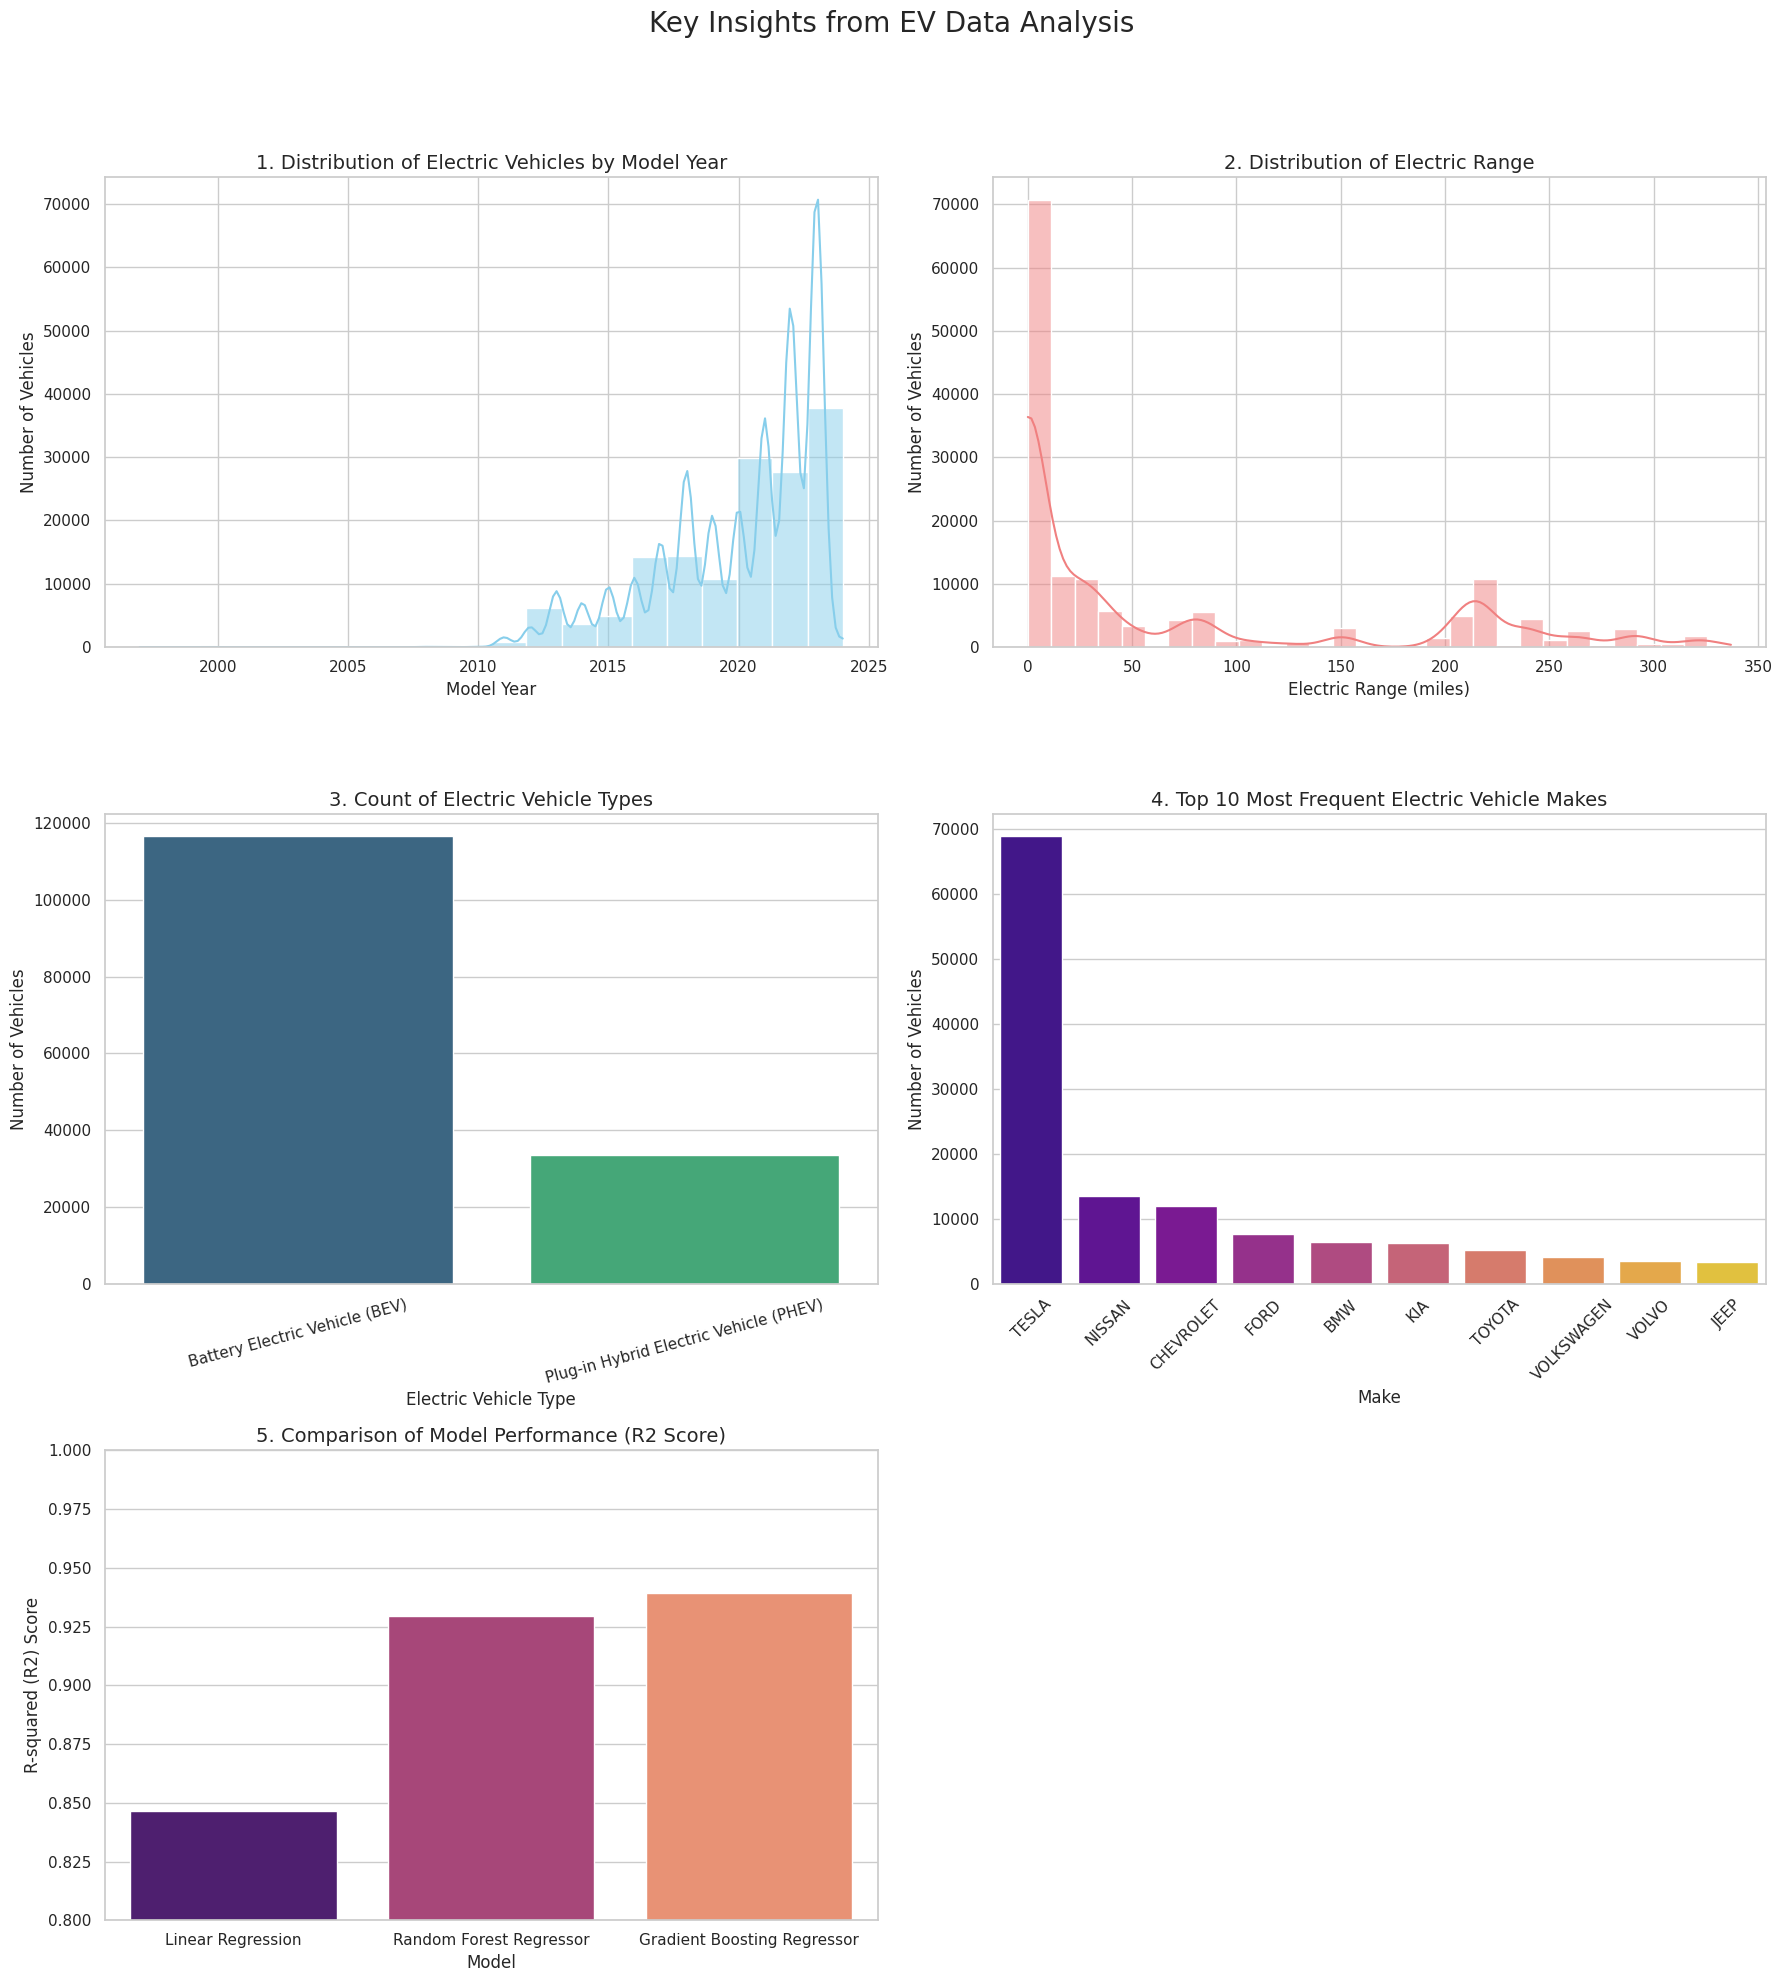

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a consistent style for all plots
sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
fig.suptitle('Key Insights from EV Data Analysis', fontsize=20, y=1.02)

# Chart 1: Distribution of Electric Vehicles by Model Year
sns.histplot(df['Model Year'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('1. Distribution of Electric Vehicles by Model Year', fontsize=14)
axes[0, 0].set_xlabel('Model Year', fontsize=12)
axes[0, 0].set_ylabel('Number of Vehicles', fontsize=12)

# Chart 2: Distribution of Electric Range
sns.histplot(df['Electric Range'], bins=30, kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('2. Distribution of Electric Range', fontsize=14)
axes[0, 1].set_xlabel('Electric Range (miles)', fontsize=12)
axes[0, 1].set_ylabel('Number of Vehicles', fontsize=12)

# Chart 3: Count of Electric Vehicle Types
sns.countplot(data=df, x='Electric Vehicle Type', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('3. Count of Electric Vehicle Types', fontsize=14)
axes[1, 0].set_xlabel('Electric Vehicle Type', fontsize=12)
axes[1, 0].set_ylabel('Number of Vehicles', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=15)

# Chart 4: Top 10 Most Frequent Electric Vehicle Makes
top_10_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_10_makes.index, y=top_10_makes.values, ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('4. Top 10 Most Frequent Electric Vehicle Makes', fontsize=14)
axes[1, 1].set_xlabel('Make', fontsize=12)
axes[1, 1].set_ylabel('Number of Vehicles', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45) # Removed ha='right'

# Chart 5: Model Performance Comparison (R2 Score)
metrics_data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [mae_linear, mae_rf, mae_gb],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'R2 Score': [r2_linear, r2_rf, r2_gb]
}
metrics_df = pd.DataFrame(metrics_data)
sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[2, 0], palette='magma')
axes[2, 0].set_title('5. Comparison of Model Performance (R2 Score)', fontsize=14)
axes[2, 0].set_xlabel('Model', fontsize=12)
axes[2, 0].set_ylabel('R-squared (R2) Score', fontsize=12)
axes[2, 0].set_ylim(0.8, 1.0) # Focus on the relevant range for R2

# Hide the unused subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()